In [187]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

**About the dataset:**

The following set contains customer details about loans from the past, whether they we at default or paid-off.

Description of fields in our data set:

* Gender:	Applicant's Gender
* Age:	Applicant's Age
* Loan_status: Loan paid or gone into collections
* Principal:	Principal Loan Amount
* Terms:	Monthly, bi-weekly or weekly schedule of payoff
* Effective_date:	Loan Origination Date
* Due_date:	Each loan has a single due date, since it’s one-time payoff schedule
* Education:	Applicant's Education


In [188]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Project_On_Loans_TrainingSet.csv')
df.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   Unnamed: 0.1.1  346 non-null    int64 
 3   loan_status     346 non-null    object
 4   Principal       346 non-null    int64 
 5   terms           346 non-null    int64 
 6   effective_date  346 non-null    object
 7   due_date        346 non-null    object
 8   age             346 non-null    int64 
 9   education       346 non-null    object
 10  Gender          346 non-null    object
dtypes: int64(6), object(5)
memory usage: 29.9+ KB


In [190]:
df.shape

(346, 11)

In [191]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Principal,terms,age
count,346.00000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,172.50000,202.167630,202.167630,943.641618,22.653179,30.939306
std,100.02583,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.00000,0.000000,0.000000,300.000000,7.000000,18.000000
25%,86.25000,107.250000,107.250000,900.000000,15.000000,27.000000
50%,172.50000,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,258.75000,298.750000,298.750000,1000.000000,30.000000,35.000000
max,345.00000,399.000000,399.000000,1000.000000,30.000000,51.000000


Date/Time Object Conversion:

In [192]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male
345,345,399,399,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male


###Data Pre-Processing and Data Visualization

In [193]:
df['loan_status'].value_counts()


PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

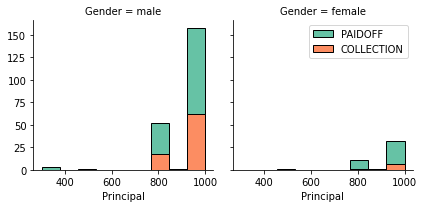

In [194]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

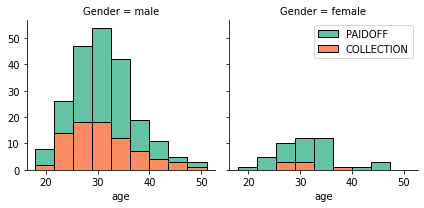

In [195]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Feature Selection and Extraction

Day of the Week that People get Loans:

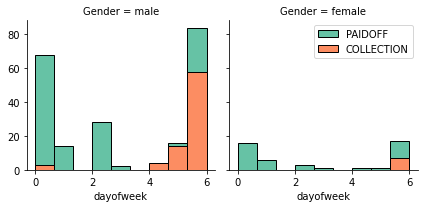

In [196]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Apparently, applicants who get the loan at the end of the week, default. Using Feature binarization to set a threshold value less than day 4

In [197]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


Converting Categorical to Numerical features:

In [198]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


Let's apply '[One-hot encoding](https://developers.google.com/machine-learning/crash-course/representation/feature-engineering)', a process to convert categorical data variables, to provide to machine learning algorithms in order to improve predictions:

In [199]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

Features before our One Hot Encoding Process:

In [200]:
df[['Principal','terms','age','Gender','education']].head()


,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [201]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Feature Selection:

In [202]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Labels: (Project Y)

In [203]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Normalization: *Data Standardization* give data zero mean and unit variance (This should technically be done post train test split). More info [here](https://developers.google.com/machine-learning/data-prep/transform/normalization)


In [204]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

Let's now look at classification algorithms:
* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression


In [205]:
# Python Libraries imported by me as a standard template, all may not be used, not efficient, but just for the sake of speed
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import svm
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


KNN:

In [207]:
  j = 10
  for i in range(1,j):
      
    KNN_model = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat_Knn = KNN_model.predict(X_test)
    acc_sc= (metrics.accuracy_score(y_test, yhat_Knn))
    print('Neighbour {} with acuracy {}'. format(i, acc_sc))

Neighbour 1 with acuracy 0.7
Neighbour 2 with acuracy 0.6142857142857143
Neighbour 3 with acuracy 0.7571428571428571
Neighbour 4 with acuracy 0.6571428571428571
Neighbour 5 with acuracy 0.8142857142857143
Neighbour 6 with acuracy 0.7142857142857143
Neighbour 7 with acuracy 0.7857142857142857
Neighbour 8 with acuracy 0.8
Neighbour 9 with acuracy 0.7428571428571429


In [208]:
k=7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat_knn = neigh.predict(X_test)
jc_knn = jaccard_score(y_test,yhat_knn,pos_label="PAIDOFF")
print(classification_report(y_test,yhat_knn))

              precision    recall  f1-score   support

  COLLECTION       0.43      0.21      0.29        14
     PAIDOFF       0.83      0.93      0.87        56

    accuracy                           0.79        70
   macro avg       0.63      0.57      0.58        70
weighted avg       0.75      0.79      0.76        70



Decision Tree:

In [209]:
dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
dtree.fit(X_train, y_train)
predtree = dtree.predict(X_test)

In [210]:
print("Decision tree accuracy :",metrics.accuracy_score(y_test,predtree) )

Decision tree accuracy : 0.7857142857142857


In [211]:
jc_dtree = jaccard_score(y_test,predtree,pos_label="PAIDOFF")
jc_dtree

0.7857142857142857

Support Vector Machine:

In [212]:
clf = svm.SVC(kernel = "rbf")
clf.fit(X_train,y_train)
SVC()

SVC()

In [213]:
yhat_svm = clf.predict(X_test)

In [214]:
jc_svm = jaccard_score(y_test,yhat_svm,pos_label="PAIDOFF")
jc_svm

0.7714285714285715

In [215]:
print(classification_report(y_test,yhat_svm))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.79      0.96      0.87        56

    accuracy                           0.77        70
   macro avg       0.40      0.48      0.44        70
weighted avg       0.64      0.77      0.70        70



Logistic Regression:

In [216]:
LR = LogisticRegression(C = 0.01, solver = "liblinear").fit(X_train, y_train)
yhat_LR = LR.predict(X_test)

In [217]:
jc_logreg = jaccard_score(y_test,yhat_LR,pos_label="PAIDOFF")
jc_logreg

0.7575757575757576

In [218]:
print(classification_report(y_test,yhat_LR))


              precision    recall  f1-score   support

  COLLECTION       0.40      0.29      0.33        14
     PAIDOFF       0.83      0.89      0.86        56

    accuracy                           0.77        70
   macro avg       0.62      0.59      0.60        70
weighted avg       0.75      0.77      0.76        70



Evaluating our Models using test set:

In [219]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [220]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/Project_On_Loans_Testset.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [221]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [222]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [223]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [224]:
test_df["loan_status"].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [225]:
test_df.groupby(["Gender"])["loan_status"].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [226]:
test_df["Gender"].replace(to_replace = ["male","female"], value = [0,1], inplace = True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [227]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [228]:
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000.0,30.0,50.0,1.0,0.0,0,1,0
1,300.0,7.0,35.0,0.0,1.0,1,0,0
2,1000.0,30.0,43.0,1.0,1.0,0,0,1
3,1000.0,30.0,26.0,0.0,1.0,0,0,1
4,800.0,15.0,29.0,0.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...
341,NaN,NaN,NaN,NaN,NaN,0,1,0
342,NaN,NaN,NaN,NaN,NaN,0,1,0
343,NaN,NaN,NaN,NaN,NaN,0,0,1
344,NaN,NaN,NaN,NaN,NaN,0,0,1


In [229]:
Feature_test = Feature_test[Feature_test["Principal"].notna()]
Feature_test

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000.0,30.0,50.0,1.0,0.0,0,1,0
1,300.0,7.0,35.0,0.0,1.0,1,0,0
2,1000.0,30.0,43.0,1.0,1.0,0,0,1
3,1000.0,30.0,26.0,0.0,1.0,0,0,1
4,800.0,15.0,29.0,0.0,1.0,0,0,1
5,700.0,15.0,33.0,0.0,1.0,0,0,1
6,1000.0,15.0,24.0,0.0,1.0,0,0,1
7,1000.0,30.0,32.0,0.0,1.0,0,0,1
8,800.0,15.0,27.0,1.0,1.0,0,0,1
9,1000.0,15.0,37.0,0.0,1.0,0,1,0


In [230]:
X2 = Feature_test
X2[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000.0,30.0,50.0,1.0,0.0,0,1,0
1,300.0,7.0,35.0,0.0,1.0,1,0,0
2,1000.0,30.0,43.0,1.0,1.0,0,0,1
3,1000.0,30.0,26.0,0.0,1.0,0,0,1
4,800.0,15.0,29.0,0.0,1.0,0,0,1


In [231]:
y2 = test_df['loan_status'].values
y2[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [232]:
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
        -0.47673129,  1.41421356, -0.92847669],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
         2.0976177 , -0.70710678, -0.92847669],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.47673129, -0.70710678,  1.07703296],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.47673129, -0.70710678,  1.07703296],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
        -0.47673129, -0.70710678,  1.07703296]])

In [233]:
yhat_knn2 = neigh.predict(X2)
yhat_knn2[0:5]


array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF'],
      dtype=object)

In [234]:
jc_knn2 = jaccard_score(y2,yhat_knn2,pos_label="PAIDOFF")
jc_knn2

0.7659574468085106

In [235]:
print(classification_report(y2,yhat_knn2))

              precision    recall  f1-score   support

  COLLECTION       0.64      0.50      0.56        14
     PAIDOFF       0.84      0.90      0.87        40

    accuracy                           0.80        54
   macro avg       0.74      0.70      0.71        54
weighted avg       0.79      0.80      0.79        54



In [236]:
f1_knn2 = f1_score(y2, yhat_knn2, average='weighted')
f1_knn2

0.7877554663096832

In [237]:
predtree2 = dtree.predict(X2)
print(predtree2[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [238]:
jc_dtree2 = jaccard_score(y2,predtree2,pos_label="PAIDOFF")
jc_dtree2

0.78

In [239]:
print(classification_report(y2,predtree2))


              precision    recall  f1-score   support

  COLLECTION       0.80      0.29      0.42        14
     PAIDOFF       0.80      0.97      0.88        40

    accuracy                           0.80        54
   macro avg       0.80      0.63      0.65        54
weighted avg       0.80      0.80      0.76        54



In [240]:
f1_dtree2 = f1_score(y2, predtree2, average='weighted')
f1_dtree2

0.7583503077293734

In [241]:
yhat_svm2 = clf.predict(X2)
yhat_svm2[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [242]:
jc_svm2 = jaccard_score(y2,yhat_svm2,pos_label="PAIDOFF")
jc_svm2

0.7450980392156863

In [243]:
print(classification_report(y2,yhat_svm2))

              precision    recall  f1-score   support

  COLLECTION       0.60      0.21      0.32        14
     PAIDOFF       0.78      0.95      0.85        40

    accuracy                           0.76        54
   macro avg       0.69      0.58      0.58        54
weighted avg       0.73      0.76      0.71        54



In [244]:
f1_svm2 = f1_score(y2, yhat_svm2, average='weighted')
f1_svm2

0.7144140000438048

In [245]:
yhat_LR2 = LR.predict(X2)
yhat_LR2

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [246]:
jc_logreg2 = jaccard_score(y2,yhat_LR2,pos_label="PAIDOFF")
jc_logreg2

0.7307692307692307

In [247]:
print(classification_report(y2,yhat_LR2))

              precision    recall  f1-score   support

  COLLECTION       0.50      0.14      0.22        14
     PAIDOFF       0.76      0.95      0.84        40

    accuracy                           0.74        54
   macro avg       0.63      0.55      0.53        54
weighted avg       0.69      0.74      0.68        54



In [248]:
f1_logreg2 = f1_score(y2, yhat_LR2, average='weighted')
f1_logreg2

0.683127572016461

In [249]:
yhat_prob2 = LR.predict_proba(X2)
LogLoss_logreg2 = log_loss(y2, yhat_prob2,)
LogLoss_logreg2

0.5713222965045663

###Our Final Evaluation Summary of the various models:

In [250]:
df_eval_metrics_dict = { "Algorithm": ["KNN", "Decision Tree", "SVM", 
                                  "Logistic Regression"],
                   "Jaccard":[jc_knn2,jc_dtree2,jc_svm2,jc_logreg2],
                  "F1-score":[f1_knn2,f1_dtree2,f1_svm2,f1_logreg2] ,
                  "LogLoss": ["NA","NA","NA",LogLoss_logreg2]}
df_eval_metrics = pd.DataFrame(df_eval_metrics_dict)  
df_eval_metrics      

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.765957,0.787755,NA
1,Decision Tree,0.780000,0.758350,NA
2,SVM,0.745098,0.714414,NA
3,Logistic Regression,0.730769,0.683128,0.571322


We could go with Support Vector Machine for this data set